# Stock Normalized Sortino Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'SNAP'

In [3]:
df = yf.download("SNAP", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
def normalized_sortino_ratio(stock_returns):
    rf = 0.001
    numer = stock_returns.mean() - rf
    normalize_denom = (stock_returns - stock_returns.mean())/ stock_returns.std()
    dr = ((normalize_denom[normalize_denom <0].fillna(0))**2).mean()
    sortino_ratio = numer / dr**(1/2)
    return sortino_ratio

Text(0, 0.5, 'Normalized Sortino Ratio')

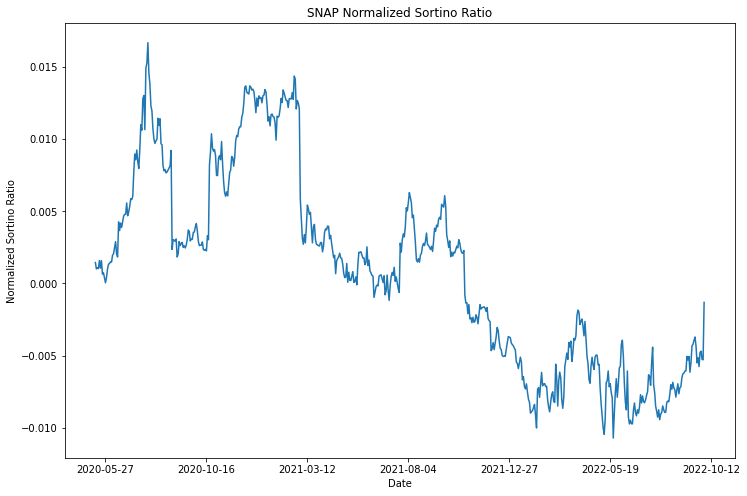

In [6]:
# Compute the running Normalized Sortino Ratio
running_sharpe = [normalized_sortino_ratio(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running Normalized Sortino Ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Normalized Sortino Ratio')
plt.xlabel('Date')
plt.ylabel('Normalized Sortino Ratio')

In [7]:
normalized_sortino_ratio(returns)

-7.600178538079719e-05